# KNN

In [130]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc("font", family= 'Noto Sans CJK JP')
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")

In [131]:
df_raw=pd.read_csv("/home/piai/바탕화면/2. Big Data 분석/유방암.csv", encoding='euc-kr')
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [132]:
df_raw.isnull().sum()

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

In [133]:
df_raw_x=df_raw.drop("diagnosis", axis=1, inplace=False)

In [134]:
df_raw_y=df_raw["diagnosis"]

In [135]:
df_raw_y.value_counts()

음성    212
양성    108
Name: diagnosis, dtype: int64

In [136]:
df_raw_y=df_raw["diagnosis"].replace({"음성": 0, "양성":1})

In [137]:
df_raw_y.value_counts()

0    212
1    108
Name: diagnosis, dtype: int64

## 데이터를 불러오고, 기술통계량과 행열, 결측치를 확인해주었고, 이상치는 데이터 수가 적기에 처리해주지 않았습니다. 또한 음성과 양성은 각각 모델에 적용시켜주기 위해 0과 1로 치환해주고 확인하였습니다.

In [138]:
display("설명변수:",df_raw_x.head())
display("목표변수:",df_raw_y.head())

'설명변수:'

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,0.06400,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,0.05669,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


'목표변수:'

0    0
1    1
2    0
3    1
4    1
Name: diagnosis, dtype: int64

In [139]:
v_feature_names=df_raw_x.columns

In [140]:
scaler=StandardScaler()

In [141]:
df_x_scaled=scaler.fit_transform(df_raw_x)
df_x_scaled=pd.DataFrame(df_x_scaled, columns=v_feature_names)

In [142]:
display("Scale 변환 전:", df_raw_x.head())
display("Scale 변환 후:", df_x_scaled.head())

'Scale 변환 전:'

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,0.06400,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,0.05669,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


'Scale 변환 후:'

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,-0.157678,-0.879112,-0.165550,-0.232872,-0.744948,-0.479220,-0.550769,-0.628488,-0.997431,-0.392627,...,-0.149283,-1.156442,-0.153789,-0.224951,0.490637,0.139396,-0.094470,-0.301949,0.525611,0.511081
1,-1.312779,-2.560965,-1.328928,-1.150194,-0.240274,-1.153621,-1.143404,-1.199934,-1.773612,0.184077,...,-1.341759,-2.517236,-1.380396,-1.124201,0.254373,-1.046076,-1.159323,-1.480312,-1.387506,-0.507149
2,0.695279,-0.420644,0.602798,0.596040,-0.947380,-0.675307,-0.477679,-0.212084,-0.899042,-1.174101,...,0.534893,-0.143296,0.445031,0.432104,-0.613360,-0.367031,0.004076,0.172850,0.223844,-0.886803
3,-0.211154,-1.301385,-0.255876,-0.308762,-1.291796,-0.661126,-0.788224,-0.834410,-0.658535,-0.834209,...,-0.263312,-1.490846,-0.312546,-0.354487,-1.339335,-0.169261,-0.176669,-0.458230,-0.524077,-0.220788
4,-0.753945,-1.738136,-0.820314,-0.745704,-2.095198,-1.505004,-1.175403,-1.326415,-1.933950,-0.956793,...,-0.951354,-1.934512,-0.997708,-0.869505,-1.783511,-1.108951,-1.094404,-1.366747,-1.071301,-0.898278


In [143]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y,test_size=0.4, random_state=6659)
print("분할 전 Train Data:{}".format(df_train_x.shape))
print("분할 후 Test Data:{}".format(df_test_x.shape))

분할 전 Train Data:(192, 30)
분할 후 Test Data:(128, 30)


## 스케일러를 통하여 단위를 일정하게 맞춰주었고, 데이터를 6:4 비율로 training 과 test로 분리해주었습니다. 난수는 6659를 사용하였습니다.

In [144]:
knn_uncust=KNeighborsClassifier()

In [145]:
knn_uncust.fit(df_train_x,df_train_y)

KNeighborsClassifier()

In [146]:
print("Accurary on training: {:.3f}".format(knn_uncust.score(df_train_x,df_train_y)))
print("Accuracy on test set: {:.3f}".format(knn_uncust.score(df_test_x,df_test_y)))

Accurary on training: 0.932
Accuracy on test set: 0.922


In [147]:
print(knn_uncust.get_params().keys())
print(knn_uncust.get_params().values())

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])
dict_values(['auto', 30, 'minkowski', None, None, 5, 2, 'uniform'])


## KNN 모델을 구축해주고 Train과 Test 데이터의 성능을 보았습니다. 두 모델 모두 성능이 높지만 시각화나 파라미터를 보면서 과적합이 있는지 확인해보아야합니다.

In [148]:
train_accuracy=[]; test_accuracy=[]
para_n_neighbors=[i for i in range(1,16)]

for v_n_neighbors in para_n_neighbors:
    knn= KNeighborsClassifier(n_neighbors=v_n_neighbors)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x,df_test_y))

In [149]:
df_accuracy_neighbors= pd.DataFrame()
df_accuracy_neighbors["Neighbors"]=para_n_neighbors
df_accuracy_neighbors["TrainScore"]= train_accuracy
df_accuracy_neighbors["TestScore"]=test_accuracy
df_accuracy_neighbors.round(3)


,Neighbors,TrainScore,TestScore
0,1,1.000,0.898
1,2,0.953,0.906
2,3,0.943,0.914
3,4,0.948,0.914
4,5,0.932,0.922
5,6,0.948,0.930
6,7,0.938,0.914
7,8,0.938,0.898
8,9,0.938,0.914
9,10,0.922,0.898


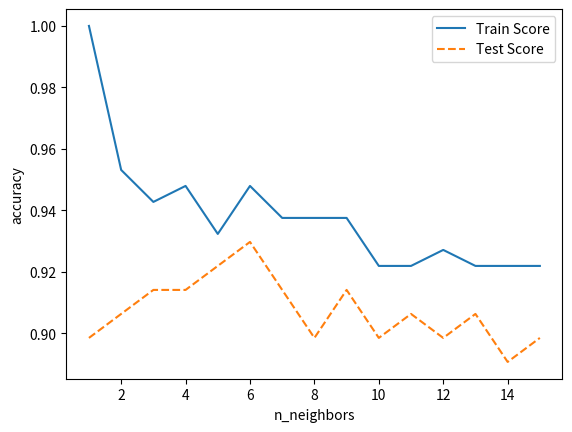

In [150]:
plt.plot(para_n_neighbors, train_accuracy, linestyle="-", label="Train Score")
plt.plot(para_n_neighbors, test_accuracy, linestyle="--", label="Test Score")
plt.xlabel("n_neighbors"); plt.ylabel("accuracy")
plt.legend()

## n_neighbors에 따른 성능을 시각화하였습니다. test 데이터의 성능은 n_neighbors가 6일때 가장 높기에 6을 선정해주었습니다.

In [151]:
train_accuracy=[]; test_accuracy=[]
para_n_neighbors=[i for i in range(1,11)]*2
para_weights=(["uniform"])*10+(["distance"]*10)

for (v_n_neighbors, v_weights) in zip(para_n_neighbors, para_weights) :
    knn= KNeighborsClassifier(n_neighbors=v_n_neighbors, weights= v_weights)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x,df_test_y))

In [152]:
df_accuracy_weights= pd.DataFrame()
df_accuracy_weights["Neighbors"]=para_n_neighbors
df_accuracy_weights["Weights"]=para_weights
df_accuracy_weights["TrainAccuracy"]= train_accuracy
df_accuracy_weights["TestAccuracy"]=test_accuracy
df_accuracy_weights.round(3)


,Neighbors,Weights,TrainAccuracy,TestAccuracy
0,1,uniform,1.000,0.898
1,2,uniform,0.953,0.906
2,3,uniform,0.943,0.914
3,4,uniform,0.948,0.914
4,5,uniform,0.932,0.922
5,6,uniform,0.948,0.930
6,7,uniform,0.938,0.914
7,8,uniform,0.938,0.898
8,9,uniform,0.938,0.914
9,10,uniform,0.922,0.898


In [153]:
df_accuracy_weights_pivot=df_accuracy_weights.pivot(index="Neighbors", columns="Weights", values=["TrainAccuracy","TestAccuracy"])
df_accuracy_weights_pivot

TrainAccuracy           TestAccuracy          
Weights        distance   uniform     distance   uniform
Neighbors                                               
1                   1.0  1.000000     0.898438  0.898438
2                   1.0  0.953125     0.898438  0.906250
3                   1.0  0.942708     0.914062  0.914062
4                   1.0  0.947917     0.898438  0.914062
5                   1.0  0.932292     0.921875  0.921875
6                   1.0  0.947917     0.906250  0.929688
7                   1.0  0.937500     0.914062  0.914062
8                   1.0  0.937500     0.906250  0.898438
9                   1.0  0.937500     0.906250  0.914062
10                  1.0  0.921875     0.906250  0.898438

In [154]:
level0=df_accuracy_weights_pivot.columns.get_level_values(0)
level1=df_accuracy_weights_pivot.columns.get_level_values(1)

df_accuracy_weights_pivot.columns=level0+"_"+level1
df_accuracy_weights_pivot.head()

,TrainAccuracy_distance,TrainAccuracy_uniform,TestAccuracy_distance,TestAccuracy_uniform
Neighbors,,,,
1,1.0,1.000000,0.898438,0.898438
2,1.0,0.953125,0.898438,0.906250
3,1.0,0.942708,0.914062,0.914062
4,1.0,0.947917,0.898438,0.914062
5,1.0,0.932292,0.921875,0.921875


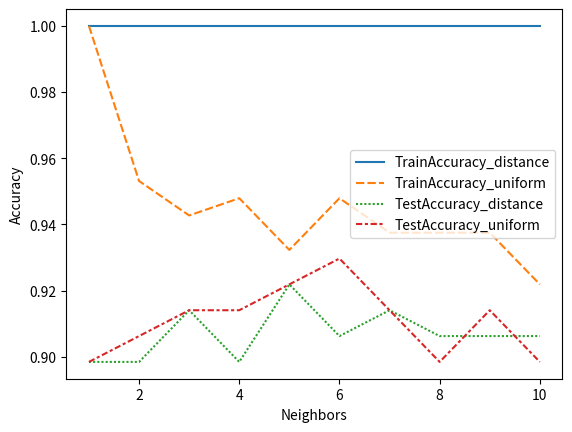

In [155]:
sns.lineplot(data=df_accuracy_weights_pivot)
plt.ylabel("Accuracy");

## distance와 uniform에 대해서 각각 n_neighbors를 1~10까지 설정하고 돌려보았을 때, n_neighbors 6에 uniform일때가 train , test 성능이 가장 높아 결정해주었습니다.

In [156]:
train_accuracy=[]; test_accuracy=[]
para_n_neighbors=[i for i in range(1,11)]*2
para_metric=["euclidean"]*10+["manhattan"]*10

for (v_n_neighbors, v_metric) in zip(para_n_neighbors, para_metric) :
    knn= KNeighborsClassifier(n_neighbors=v_n_neighbors, metric=v_metric, weights="uniform")
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x,df_test_y))

In [157]:
df_accuracy_metric= pd.DataFrame()
df_accuracy_metric["Neighbors"]=para_n_neighbors
df_accuracy_metric["Metric"]=para_metric
df_accuracy_metric["TrainAccuracy"]= train_accuracy
df_accuracy_metric["TestAccuracy"]=test_accuracy
df_accuracy_metric.round(3)


,Neighbors,Metric,TrainAccuracy,TestAccuracy
0,1,euclidean,1.000,0.898
1,2,euclidean,0.953,0.906
2,3,euclidean,0.943,0.914
3,4,euclidean,0.948,0.914
4,5,euclidean,0.932,0.922
5,6,euclidean,0.948,0.930
6,7,euclidean,0.938,0.914
7,8,euclidean,0.938,0.898
8,9,euclidean,0.938,0.914
9,10,euclidean,0.922,0.898


In [158]:
df_accuracy_metric_pivot=df_accuracy_metric.pivot(index="Neighbors", columns="Metric", values=["TrainAccuracy","TestAccuracy"])
df_accuracy_metric_pivot

TrainAccuracy           TestAccuracy          
Metric        euclidean manhattan    euclidean manhattan
Neighbors                                               
1              1.000000  1.000000     0.898438  0.898438
2              0.953125  0.963542     0.906250  0.906250
3              0.942708  0.942708     0.914062  0.906250
4              0.947917  0.937500     0.914062  0.937500
5              0.932292  0.932292     0.921875  0.914062
6              0.947917  0.947917     0.929688  0.921875
7              0.937500  0.937500     0.914062  0.921875
8              0.937500  0.927083     0.898438  0.929688
9              0.937500  0.942708     0.914062  0.914062
10             0.921875  0.932292     0.898438  0.906250

In [94]:
level0=df_accuracy_metric_pivot.columns.get_level_values(0)
level1=df_accuracy_metric_pivot.columns.get_level_values(1)

df_accuracy_metric_pivot.columns=level0+"_"+level1
df_accuracy_metric_pivot.head()

,TrainAccuracy_euclidean,TrainAccuracy_manhattan,TestAccuracy_euclidean,TestAccuracy_manhattan
Neighbors,,,,
1,1.000000,1.000000,0.898438,0.898438
2,0.953125,0.963542,0.906250,0.906250
3,0.942708,0.942708,0.914062,0.906250
4,0.947917,0.937500,0.914062,0.937500
5,0.932292,0.932292,0.921875,0.914062


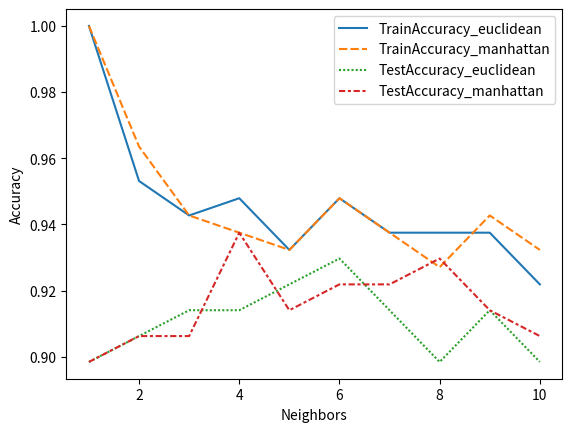

In [95]:
sns.lineplot(data=df_accuracy_metric_pivot)
plt.ylabel("Accuracy");

## 유클리디안과 맨해튼 거리방식에 따른 정확도를 시각화하였습니다. n_neighbors가 6일 때 유클리디안 거리 방식을 사용할 때가 성능이 두 모델이 둘다 좋으므로 유클리디안을 결정하였습니다.

In [159]:
knn_model= KNeighborsClassifier(n_neighbors=6, weights="uniform", metric="euclidean")
knn_model.fit(df_train_x,df_train_y)
y_pred=knn_model.predict(df_test_x)


In [160]:
print("Train Accurary: {:.3f}".format(knn_model.score(df_train_x,df_train_y)))
print("Test Accuracy: {:.3f}".format(knn_model.score(df_test_x,df_test_y)))
print("Test Confusion Matrix:\n{}".format(confusion_matrix(df_test_y , y_pred)))
print(classification_report(df_test_y, y_pred, digits=3))

Train Accurary: 0.948
Test Accuracy: 0.930
Test Confusion Matrix:
[[78  2]
 [ 7 41]]
              precision    recall  f1-score   support

           0      0.918     0.975     0.945        80
           1      0.953     0.854     0.901        48

    accuracy                          0.930       128
   macro avg      0.936     0.915     0.923       128
weighted avg      0.931     0.930     0.929       128



## 최종모델은 n=6 , uniform, 유클리디안으로 결정하였고, 정확도는 training과 test 모두 94.8, 93% 간 나왔습니다. 성능이 매우 좋으며 사용가능하다고 판단됩니다.